In [1]:

%pip install python-chess
import chess
import numpy as np

def one_hot_encode_piece(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

def encode_board(board):
    board_str = str(board)
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_piece(piece))
        board_list.append(row_list)
    return np.array(board_list)




/bin/bash: /home/platinumj/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [4]:

import pandas as pd

train_df = pd.read_csv('train.csv', index_col='id')


In [5]:


def count_material(fen):
    total_material = 0
    material_dict = {
        'p': 1,
        'b': 3,
        'n': 3,
        'r': 5,
        'q': 9
    }
    for char in fen.lower():
        if char in material_dict:
            total_material += material_dict[char]
            
    return total_material

train_df['total_material'] = train_df['board'].apply(count_material)

In [6]:

endgame_df = train_df[train_df['total_material'] < 30]
midgame_df = train_df[(30 <= train_df['total_material']) & (train_df['total_material'] <= 60)]
opening_df = train_df[60 < train_df['total_material']]

In [7]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen = fen_str)
    return encode_board(board)

In [30]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

def generate_model(data_to_train_on):
    val_df = data_to_train_on[-1000:]
    train_df = data_to_train_on[:-1000]
    
    X_train = np.stack(train_df['board'].apply(encode_fen_string))
    y_train = train_df['black_score']

    X_val = np.stack(val_df['board'].apply(encode_fen_string))
    y_val = val_df['black_score']
    
    model = Sequential([
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1),
    ])
    
    model.compile(
        optimizer='adam',
        loss='mean_squared_error')

    history = model.fit(
        X_train,
        y_train,
        epochs=40,
        validation_data=(X_val, y_val))

    import matplotlib.pyplot as plt

    plt.style.use('ggplot')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    plt.title('Loss During Training')
    plt.show()
    
    return model

Epoch 1/40
755/755 [==============================] - 9s 10ms/step - loss: 141749.3750 - val_loss: 108273.9844
Epoch 2/40
755/755 [==============================] - 8s 10ms/step - loss: 114326.2344 - val_loss: 100713.4922
Epoch 3/40
755/755 [==============================] - 5s 7ms/step - loss: 103839.6797 - val_loss: 91383.5312
Epoch 4/40
755/755 [==============================] - 5s 7ms/step - loss: 93767.3984 - val_loss: 83988.2969
Epoch 5/40
755/755 [==============================] - 5s 6ms/step - loss: 84118.5859 - val_loss: 75656.3438
Epoch 6/40
755/755 [==============================] - 5s 6ms/step - loss: 75953.7266 - val_loss: 68459.2109
Epoch 7/40
755/755 [==============================] - 5s 6ms/step - loss: 68883.7109 - val_loss: 60628.4844
Epoch 8/40
755/755 [==============================] - 5s 6ms/step - loss: 63259.7539 - val_loss: 58670.7031
Epoch 9/40
755/755 [==============================] - 5s 6ms/step - loss: 59253.8750 - val_loss: 53837.7539
Epoch 10/40
755/755 [

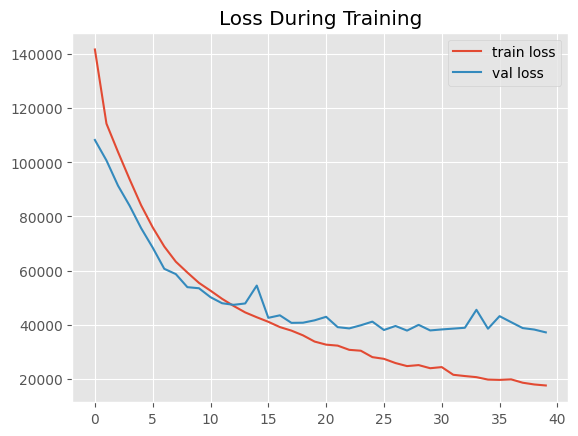

In [31]:
endgame_model = generate_model(endgame_df)

Epoch 1/40
485/485 [==============================] - 4s 6ms/step - loss: 161666.3281 - val_loss: 153167.0312
Epoch 2/40
485/485 [==============================] - 3s 7ms/step - loss: 147513.0000 - val_loss: 144987.8438
Epoch 3/40
485/485 [==============================] - 3s 6ms/step - loss: 138310.4688 - val_loss: 136252.4531
Epoch 4/40
485/485 [==============================] - 3s 7ms/step - loss: 129743.0391 - val_loss: 129042.8750
Epoch 5/40
485/485 [==============================] - 3s 5ms/step - loss: 122011.2969 - val_loss: 121783.0703
Epoch 6/40
485/485 [==============================] - 3s 6ms/step - loss: 115840.2031 - val_loss: 117737.8047
Epoch 7/40
485/485 [==============================] - 3s 7ms/step - loss: 110783.6484 - val_loss: 112583.4453
Epoch 8/40
485/485 [==============================] - 3s 7ms/step - loss: 106378.4453 - val_loss: 109018.7734
Epoch 9/40
485/485 [==============================] - 3s 6ms/step - loss: 103288.9922 - val_loss: 107750.7812
Epoch 10/4

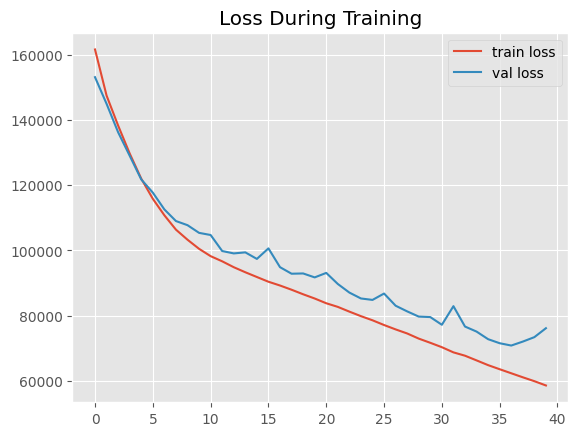

In [24]:
midgame_model= generate_model(midgame_df)

Epoch 1/40
505/505 [==============================] - 4s 7ms/step - loss: 120892.4062 - val_loss: 103758.9297
Epoch 2/40
505/505 [==============================] - 3s 7ms/step - loss: 109169.8438 - val_loss: 93622.9609
Epoch 3/40
505/505 [==============================] - 3s 7ms/step - loss: 99927.7344 - val_loss: 85717.5391
Epoch 4/40
505/505 [==============================] - 3s 6ms/step - loss: 91988.6875 - val_loss: 79812.5625
Epoch 5/40
505/505 [==============================] - 3s 6ms/step - loss: 85644.0781 - val_loss: 75152.9922
Epoch 6/40
505/505 [==============================] - 3s 5ms/step - loss: 80455.7109 - val_loss: 71870.2422
Epoch 7/40
505/505 [==============================] - 3s 6ms/step - loss: 76367.2109 - val_loss: 68712.6406
Epoch 8/40
505/505 [==============================] - 3s 6ms/step - loss: 73411.1406 - val_loss: 70016.1562
Epoch 9/40
505/505 [==============================] - 3s 5ms/step - loss: 70924.7109 - val_loss: 65434.9219
Epoch 10/40
505/505 [====

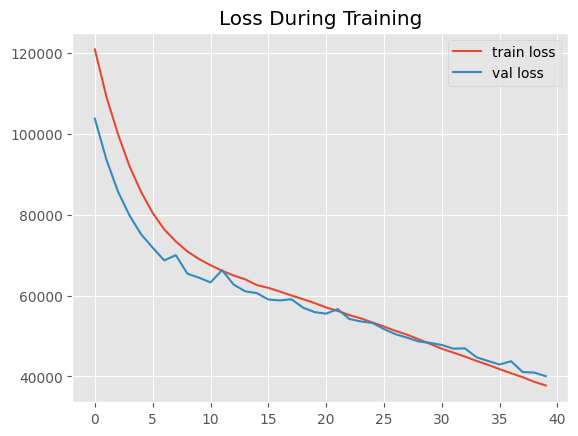

In [25]:
opengame_model = generate_model(opening_df)

In [27]:

def play_nn(fen, show_move_evaluations=False):
    board = chess.Board(fen=fen)

    material = count_material(fen)
    if material < 30:
        model = endgame_model
    elif material < 60:
        model = midgame_model
    else:
        model = opengame_model
    # And then evaluate all legal moves
    moves = []
    input_vectors = []
    for move in board.legal_moves:
        candidate_board = board.copy()
        candidate_board.push(move)
        moves.append(move)
        input_vectors.append(encode_board(str(candidate_board)).astype(np.int32).flatten())
    
    input_vectors = np.stack(input_vectors)
    scores = model.predict(input_vectors, verbose=0)
    # argmax gives us the index of the highest scoring move
    if board.turn == chess.BLACK:
        index_of_best_move = np.argmax(scores)
    else:
       index_of_best_move = np.argmax(-scores)

    if show_move_evaluations:
        print(zip(moves, scores))
        
    best_move = moves[index_of_best_move]

    return str(best_move)

In [28]:
from IPython.display import SVG, display

def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:
        # We print out the board as an SVG
        display(SVG(board._repr_svg_()))

        # If it's white's turn, we have the user play
        if board.turn == chess.WHITE:
            user_move = input('Your move: ')
            if user_move == 'quit':
                break
            while user_move not in [str(move) for move in board.legal_moves]:
                print('That wasn\'t a valid move. Please enter a move in Standard Algebraic Notation')
                user_move = input('Your move: ')
            board.push_san(user_move)

        # If it's black's turn, we have the AI play
        elif board.turn == chess.BLACK:
            ai_move = ai_function(board.fen())
            print(f'AI move: {ai_move}')
            board.push_san(ai_move)
    print(board.outcome())

In [32]:
endgame_model.save("ensemble/endgame_model")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8effec9a30>, 140252294791296), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8f083ba040>, 140252294793216), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8fbc49f580>, 140255315881856), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8fbc493f70>, 140255315533136), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dt

2023-05-14 11:32:01.187154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-05-14 11:32:01.199546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-14 11:32:01.371018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8effec9a30>, 140252294791296), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8f083ba040>, 140252294793216), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8fbc49f580>, 140255315881856), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8fbc493f70>, 140255315533136), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dt

2023-05-14 11:32:01.404943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ensemble/endgame_model/assets


INFO:tensorflow:Assets written to: ensemble/endgame_model/assets


In [33]:
midgame_model.save("ensemble/midgame_model")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4471f10>, 140251957284016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4471f10>, 140251957284016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4484760>, 140251957283776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4484760>, 140251957283776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4487b50>, 140251957283616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4487b50>, 140251957283616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef44136a0>, 140251957284176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef44136a0>, 140251957284176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4471f10>, 140251957284016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4471f10>, 140251957284016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4484760>, 140251957283776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4484760>, 140251957283776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4487b50>, 140251957283616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef4487b50>, 140251957283616), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef44136a0>, 140251957284176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8ef44136a0>, 140251957284176), {}).


INFO:tensorflow:Assets written to: ensemble/midgame_model/assets


INFO:tensorflow:Assets written to: ensemble/midgame_model/assets


In [34]:
opengame_model.save("ensemble/opengame_model")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaaf0b80>, 140252828895872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaaf0b80>, 140252828895872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efab90c40>, 140252828893792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efab90c40>, 140252828893792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaba1a00>, 140252828896672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaba1a00>, 140252828896672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efabafa90>, 140252828894032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efabafa90>, 140252828894032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaaf0b80>, 140252828895872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(832, 512), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaaf0b80>, 140252828895872), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efab90c40>, 140252828893792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efab90c40>, 140252828893792), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaba1a00>, 140252828896672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(512, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efaba1a00>, 140252828896672), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efabafa90>, 140252828894032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f8efabafa90>, 140252828894032), {}).


INFO:tensorflow:Assets written to: ensemble/opengame_model/assets


INFO:tensorflow:Assets written to: ensemble/opengame_model/assets
